In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
import altair as alt # visualization
import statsmodels.api as sm
import itertools

In [2]:
pip install altair vega_datasets


Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("BAJAJ-AUTO.csv")

df = pd.read_csv("BAJAJ-AUTO.csv")

In [4]:
df.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJ-AUTO,EQ,2101.05,898.00,898.00,551.35,600.25,604.75,624.61,3972485,2.481245e+14,NaN,1202933,0.3028
1,2008-05-27,BAJAJ-AUTO,EQ,604.75,624.70,639.00,580.30,595.50,593.15,606.43,1751063,1.061901e+14,NaN,369389,0.2110
2,2008-05-28,BAJAJ-AUTO,EQ,593.15,561.65,621.90,561.65,605.10,608.15,608.75,1652355,1.005877e+14,NaN,898602,0.5438
3,2008-05-29,BAJAJ-AUTO,EQ,608.15,619.40,619.40,576.00,600.00,599.45,600.98,669269,4.022165e+13,NaN,449951,0.6723
4,2008-05-30,BAJAJ-AUTO,EQ,599.45,605.40,607.00,538.00,576.25,571.70,565.55,1262117,7.137937e+13,NaN,936432,0.7420
5,2008-06-02,BAJAJ-AUTO,EQ,571.70,605.50,615.00,570.70,573.00,580.80,598.30,206640,1.236326e+13,NaN,69415,0.3359
6,2008-06-03,BAJAJ-AUTO,EQ,580.80,596.00,602.00,555.15,577.00,579.70,575.83,157283,9.056802e+12,NaN,106984,0.6802
7,2008-06-04,BAJAJ-AUTO,EQ,579.70,597.85,597.85,547.50,550.00,552.10,563.64,326450,1.839993e+13,NaN,238952,0.7320
8,2008-06-05,BAJAJ-AUTO,EQ,552.10,553.00,588.80,532.40,548.00,562.40,560.70,238915,1.339603e+13,NaN,140638,0.5887
9,2008-06-06,BAJAJ-AUTO,EQ,562.40,567.00,574.70,544.40,572.00,568.80,564.38,73920,4.171903e+12,NaN,35676,0.4826


# Now that our data has been converted into the desired format, let’s take a look at its various columns for further analysis.

# The Open and Close columns indicate the opening and closing price of the stocks on a particular day.
# The High and Low columns provide the highest and the lowest price for the stock on a particular day, respectively.
# The Volume column tells us the total volume of stocks traded on a particular day. The volume weighted average price (VWAP) is a trading benchmark used by traders that gives the average price a security has traded at throughout the day, based on both volume and price. It is important because it provides traders with insight into both the trend and value of a security.source.

In [5]:
df.shape

(2993, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2993 non-null   object 
 1   Symbol              2993 non-null   object 
 2   Series              2993 non-null   object 
 3   Prev Close          2993 non-null   float64
 4   Open                2993 non-null   float64
 5   High                2993 non-null   float64
 6   Low                 2993 non-null   float64
 7   Last                2993 non-null   float64
 8   Close               2993 non-null   float64
 9   VWAP                2993 non-null   float64
 10  Volume              2993 non-null   int64  
 11  Turnover            2993 non-null   float64
 12  Trades              2247 non-null   float64
 13  Deliverable Volume  2993 non-null   int64  
 14  %Deliverble         2993 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 350.9

In [7]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                746
Deliverable Volume      0
%Deliverble             0
dtype: int64

# Splitting the data into  month,week,day and day of week.

In [8]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["week"] = df.Date.dt.week
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.fillna(df.mean(), inplace=True)

df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJ-AUTO,EQ,2101.05,898.00,898.0,551.35,600.25,604.75,624.61,3972485,2.481245e+14,25383.081442,1202933,0.3028,5,22,26,0
2008-05-27,2008-05-27,BAJAJ-AUTO,EQ,604.75,624.70,639.0,580.30,595.50,593.15,606.43,1751063,1.061901e+14,25383.081442,369389,0.2110,5,22,27,1
2008-05-28,2008-05-28,BAJAJ-AUTO,EQ,593.15,561.65,621.9,561.65,605.10,608.15,608.75,1652355,1.005877e+14,25383.081442,898602,0.5438,5,22,28,2
2008-05-29,2008-05-29,BAJAJ-AUTO,EQ,608.15,619.40,619.4,576.00,600.00,599.45,600.98,669269,4.022165e+13,25383.081442,449951,0.6723,5,22,29,3
2008-05-30,2008-05-30,BAJAJ-AUTO,EQ,599.45,605.40,607.0,538.00,576.25,571.70,565.55,1262117,7.137937e+13,25383.081442,936432,0.7420,5,22,30,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2993 entries, 2008-05-26 to 2020-06-30
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2993 non-null   datetime64[ns]
 1   Symbol              2993 non-null   object        
 2   Series              2993 non-null   object        
 3   Prev Close          2993 non-null   float64       
 4   Open                2993 non-null   float64       
 5   High                2993 non-null   float64       
 6   Low                 2993 non-null   float64       
 7   Last                2993 non-null   float64       
 8   Close               2993 non-null   float64       
 9   VWAP                2993 non-null   float64       
 10  Volume              2993 non-null   int64         
 11  Turnover            2993 non-null   float64       
 12  Trades              2993 non-null   float64       
 13  Deliverable Volume  2993 non-n

# Visualization.

### Volume Weighted Average Price

In [10]:

bars = alt.Chart(df).mark_trail(color='orange').encode(
    x = 'Date:T',
    y = 'VWAP:Q',
).properties(
    title={
    "text":['Volume Weighted Average Price (VWAP)'],
    "subtitle":['There is a continuos increase in the VWAP price till 2018 and a certain dip in 2019'],
    "fontSize":15,
    "fontWeight": 'bold',
    "font":'Courier New',
    }
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
)   

(bars + text).properties( height=300, width=600)

alt.LayerChart(...)

# Open and Close Stock Price

In [11]:
# set base for creat custom legend and plots
base = alt.Chart(df).transform_calculate(
legend1="'Close prices of stocks'",
legend2="'Open price of stock'",

)
scale = alt.Scale(domain=["Close prices of stocks", "Open price of stock"], range=['blue', 'violet', ])

# timeseries plot of close prices of stocks in blue colour
line1 = base.mark_line(color='blue').encode(
x = 'Date:T',
y = 'Close:Q',
color=alt.Color('legend1:N', scale=scale, title=''),
)

# timeseries plot of open prices of stocks in blue colour
line2 = base.mark_line(color='violet').encode(
x = 'Date:T',
y = 'Open:Q',
color=alt.Color('legend2:N', scale=scale, title='')
)


text = line1.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
)   


(line1 + line2 + text).properties(
    title={"text":['Timeseries Plot of Close and Open Price of Stock Over Year'],
           "fontSize":15,
           "fontWeight": 'bold',
           "font":'Courier New',},
    height=500, width=600
).interactive()


alt.LayerChart(...)

# Moving Average (MA)
### The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks or any time period the trader chooses. source%20is,time%20period%20the%20trader%20chooses.)

In [12]:
# dataframe Moving Average for weeks 4, 16, 28, 40, 52 

df_ma = pd.DataFrame()
# Grouping the data week by week by taking its average.So there will be total 52 rows in the final list
df_ma['Close'] = df['Close'].resample('W').mean()

# calculating moving averge
df_ma['weeks_4'] = df_ma['Close'].rolling(window = 4, min_periods = 1).mean()
df_ma['weeks_16'] = df_ma['Close'].rolling(window = 16, min_periods = 1).mean()
df_ma['weeks_28'] = df_ma['Close'].rolling(window = 28, min_periods = 1).mean()
df_ma['weeks_40'] = df_ma['Close'].rolling(window = 40, min_periods = 1).mean()
df_ma['weeks_52'] = df_ma['Close'].rolling(window = 52, min_periods = 1).mean()

df_ma

,Close,weeks_4,weeks_16,weeks_28,weeks_40,weeks_52
Date,,,,,,
2008-06-01,595.440,595.44000,595.440000,595.440000,595.440000,595.440000
2008-06-08,568.760,582.10000,582.100000,582.100000,582.100000,582.100000
2008-06-15,531.010,565.07000,565.070000,565.070000,565.070000,565.070000
2008-06-22,508.490,550.92500,550.925000,550.925000,550.925000,550.925000
2008-06-29,484.300,523.14000,537.600000,537.600000,537.600000,537.600000
...,...,...,...,...,...,...
2020-06-07,2786.270,2649.86125,2505.933646,2787.159554,2857.328875,2830.473173
2020-06-14,2762.020,2677.49625,2486.145833,2771.815625,2857.014063,2826.986442
2020-06-21,2697.830,2715.02375,2470.996458,2753.028482,2852.856063,2823.915673


In [13]:
# set base for creat custom legend and plots
base = alt.Chart(df_ma.reset_index()).transform_calculate(
legend1="'Close price'",
legend2="'MA of weeks 4'",
legend3="'MA of weeks 16'",
legend4="'MA of weeks 28'",
legend5="'MA of weeks 40'",
legend6="'MA of weeks 52'"
)
scale = alt.Scale(domain=["Close price", 
                          "MA of weeks 4",
                          "MA of weeks 16",
                          "MA of weeks 28",
                          "MA of weeks 40",
                          "MA of weeks 52"], 
                  range=['blue', 
                         'gold', 
                         'darkgreen', 
                         'slategray', 
                         'deeppink',
                         'firebrick'])

line1 = base.mark_line(color='blue').encode(
x = 'Date:T',
y = 'Close:Q',
color=alt.Color('legend1:N', scale=scale, title=''),
)

line2 = base.mark_line(color='gold').encode(
x = 'Date:T',
y = 'weeks_4:Q',
color=alt.Color('legend2:N', scale=scale, title='')
)

line3 = base.mark_line(color='darkgreen').encode(
x = 'Date:T',
y = 'weeks_16:Q',
color=alt.Color('legend3:N', scale=scale, title='')
)

line4 = base.mark_line(color='slategray').encode(
x = 'Date:T',
y = 'weeks_28:Q',
color=alt.Color('legend4:N', scale=scale, title='')
)


line5 = base.mark_line(color='deeppink').encode(
x = 'Date:T',
y = 'weeks_40:Q',
color=alt.Color('legend5:N', scale=scale, title='')
)

line6 = base.mark_line(color='firebrick').encode(
x = 'Date:T',
y = 'weeks_52:Q',
color=alt.Color('legend6:N', scale=scale, title='')
)

text = line1.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
)   


(line1 + line2 + line3 + line4 + line5 + line6 +text).properties(
    title={"text":['Moving Average Plot of Stock Over the Weeks'],
           "fontSize":15,
           "fontWeight": 'bold',
           "font":'Courier New',},
    height=500, width=600
).interactive()


alt.LayerChart(...)

In [14]:
df['Date'].min(),df['Date'].max()

(Timestamp('2008-05-26 00:00:00'), Timestamp('2020-06-30 00:00:00'))

In [15]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJ-AUTO,EQ,2101.05,898.00,898.0,551.35,600.25,604.75,624.61,3972485,2.481245e+14,25383.081442,1202933,0.3028,5,22,26,0
2008-05-27,2008-05-27,BAJAJ-AUTO,EQ,604.75,624.70,639.0,580.30,595.50,593.15,606.43,1751063,1.061901e+14,25383.081442,369389,0.2110,5,22,27,1
2008-05-28,2008-05-28,BAJAJ-AUTO,EQ,593.15,561.65,621.9,561.65,605.10,608.15,608.75,1652355,1.005877e+14,25383.081442,898602,0.5438,5,22,28,2
2008-05-29,2008-05-29,BAJAJ-AUTO,EQ,608.15,619.40,619.4,576.00,600.00,599.45,600.98,669269,4.022165e+13,25383.081442,449951,0.6723,5,22,29,3
2008-05-30,2008-05-30,BAJAJ-AUTO,EQ,599.45,605.40,607.0,538.00,576.25,571.70,565.55,1262117,7.137937e+13,25383.081442,936432,0.7420,5,22,30,4


In [16]:
y=df['Close'].resample('MS').mean()

In [17]:
y

Date
2008-05-01     595.440000
2008-06-01     519.673810
2008-07-01     480.021739
2008-08-01     551.682500
2008-09-01     604.121429
                 ...     
2020-02-01    3086.510000
2020-03-01    2317.726190
2020-04-01    2363.172222
2020-05-01    2558.647368
2020-06-01    2779.061364
Freq: MS, Name: Close, Length: 146, dtype: float64

In [18]:
y.isnull().sum()

0

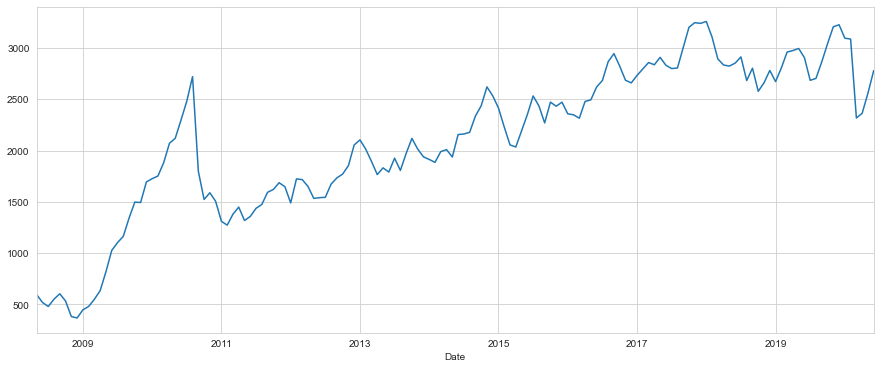

In [19]:
y.plot(figsize=(15,6))
plt.show()

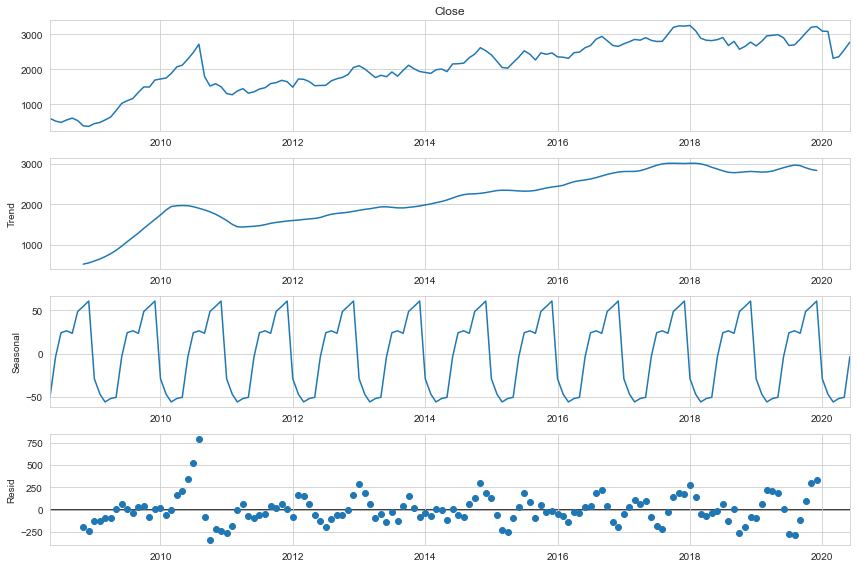

In [20]:
from pylab import rcParams

rcParams['figure.figsize']=12,8

decomposition=sm.tsa.seasonal_decompose(y,model='additive')

fig=decomposition.plot()

plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
from pandas import Series
result=adfuller(y)
print('ADF Statistic: %f' % result[0])
print('P-value: %f' % result[1])
print('Critical Values:')
for key,value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -2.173359
P-value: 0.216056
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578


In [23]:
# ARIMA.

p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12)for x in list(itertools.product(p,d,q))]
print("Examples of parameter combinations for seasonal ARIMA...")
print("SARIMA: {} x {}".format(pdq[1],seasonal_pdq[1]))
print("SARIMA: {} x {}".format(pdq[1],seasonal_pdq[2]))
print("SARIMA: {} x {}".format(pdq[1],seasonal_pdq[3]))
print("SARIMA: {} x {}".format(pdq[1],seasonal_pdq[4]))


Examples of parameter combinations for seasonal ARIMA...
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 0, 1) x (0, 1, 1, 12)
SARIMA: (0, 0, 1) x (1, 0, 0, 12)


In [24]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param,
seasonal_order=param_seasonal,                                          
enforce_stationarity = False,
enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{}12 - ATC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - ATC:2649.6690848768076
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - ATC:2301.6530157403395
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - ATC:2045.6707851470928
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - ATC:1808.107759976632
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - ATC:2057.4022514305334
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - ATC:2022.0591511692605
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - ATC:1830.9223563537153
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - ATC:1808.900393368707
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - ATC:2447.674406291885
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - ATC:2133.20227230832
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - ATC:1911.2477287655965
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - ATC:1684.1703573941159
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - ATC:1939.7318960263747
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - ATC:1884.9066658381196
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - ATC:1725.4292544852588


C:\Users\phili\anaconda3\anaco\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - ATC:1683.3581294944177
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - ATC:1865.1921630687698
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - ATC:1714.8556563284046
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - ATC:1813.0742158078094
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - ATC:1587.3885641171519
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - ATC:1728.2265579104778
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - ATC:1716.7027483652414
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - ATC:1620.8231095281978
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - ATC:1584.9412693112654
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - ATC:1851.480148887475
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - ATC:1701.5480433578243
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - ATC:1799.3148513673368
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - ATC:1575.229271803949
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - ATC:1727.0880927045769
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - ATC:1703.5396117617565
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - ATC:1620.4523332517865
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - ATC:1572.3171081811022
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - ATC:1879.15021307

C:\Users\phili\anaconda3\anaco\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - ATC:1735.4699934970945
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - ATC:1822.636183143917
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - ATC:1597.7716591363276
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - ATC:1729.7900888379272
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - ATC:1731.7258390059108
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - ATC:1612.3943629861865
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - ATC:1594.9745262926986
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - ATC:1865.3985434872059


C:\Users\phili\anaconda3\anaco\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - ATC:1721.4189793284952
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - ATC:1804.8516032633897
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - ATC:1585.0867962982738
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - ATC:1729.0823519356222
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - ATC:1717.4900652422905
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - ATC:1610.6121184126418
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - ATC:1581.3445552432502
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - ATC:1863.7756263498625
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - ATC:1714.3320658298373
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - ATC:1812.4813231644184
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - ATC:1587.652733100257
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - ATC:1714.2078042335838
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - ATC:1716.1389867548814
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - ATC:1607.962479504968
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - ATC:1585.1329682220048
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - ATC:1853.464774456581
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - ATC:1703.5176205557877
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - ATC:1801.145205757

In [25]:
df=sm.tsa.statespace.SARIMAX(y,order=(1,1,1),seasonal_order=(1,1,1,12),enforce_invertibility=False)
results=df.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9680      0.042    -23.033      0.000      -1.050      -0.886
ma.L1          1.0000      0.090     11.087      0.000       0.823       1.177
ar.S.L12      -0.2175      0.108     -2.018      0.044      -0.429      -0.006
ma.S.L12      -0.7890      0.102     -7.711      0.000      -0.990      -0.588
sigma2      2.631e+04   3.43e-06   7.68e+09      0.000    2.63e+04    2.63e+04


            lower Close  upper Close
2020-07-01  2519.371397  3158.523199
2020-08-01  2364.813016  3279.289535
2020-09-01  2319.278947  3435.257145
2020-10-01  2235.594587  3528.862464
2020-11-01  2176.919695  3619.926551
...                 ...          ...
2028-06-01 -1128.292806  8519.261689
2028-07-01 -1172.090817  8583.103422
2028-08-01 -1236.702986  8626.128908
2028-09-01 -1215.105015  8753.080407
2028-10-01 -1232.343710  8841.167007

[100 rows x 2 columns]


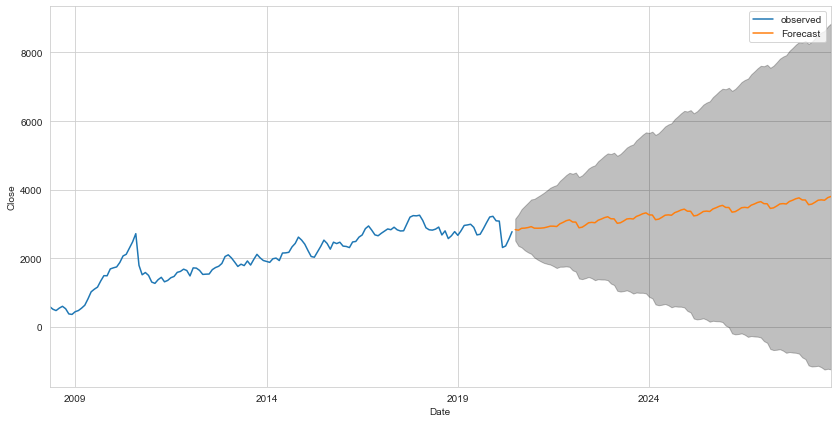

In [26]:
pred_uc=results.get_forecast(steps=100)
pred_ci=pred_uc.conf_int()
ax=y.plot(label="observed",figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label="Forecast")
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color="k",alpha=.25)
ax.set_xlabel("Date")
ax.set_ylabel("Close")
print(pred_ci)
plt.legend()
plt.show()

# Machine Learning models.

In [27]:
df2 =  pd.read_csv("BAJAJ-AUTO.csv")

In [28]:
df2.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJ-AUTO,EQ,2101.05,898.00,898.0,551.35,600.25,604.75,624.61,3972485,2.481245e+14,NaN,1202933,0.3028
1,2008-05-27,BAJAJ-AUTO,EQ,604.75,624.70,639.0,580.30,595.50,593.15,606.43,1751063,1.061901e+14,NaN,369389,0.2110
2,2008-05-28,BAJAJ-AUTO,EQ,593.15,561.65,621.9,561.65,605.10,608.15,608.75,1652355,1.005877e+14,NaN,898602,0.5438
3,2008-05-29,BAJAJ-AUTO,EQ,608.15,619.40,619.4,576.00,600.00,599.45,600.98,669269,4.022165e+13,NaN,449951,0.6723
4,2008-05-30,BAJAJ-AUTO,EQ,599.45,605.40,607.0,538.00,576.25,571.70,565.55,1262117,7.137937e+13,NaN,936432,0.7420


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2993 non-null   object 
 1   Symbol              2993 non-null   object 
 2   Series              2993 non-null   object 
 3   Prev Close          2993 non-null   float64
 4   Open                2993 non-null   float64
 5   High                2993 non-null   float64
 6   Low                 2993 non-null   float64
 7   Last                2993 non-null   float64
 8   Close               2993 non-null   float64
 9   VWAP                2993 non-null   float64
 10  Volume              2993 non-null   int64  
 11  Turnover            2993 non-null   float64
 12  Trades              2247 non-null   float64
 13  Deliverable Volume  2993 non-null   int64  
 14  %Deliverble         2993 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 350.9

In [30]:
df2.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [31]:
df2.Date = pd.to_datetime(df2.Date, format="%Y-%m-%d")
df2["month"] = df2.Date.dt.month
df2["week"] = df2.Date.dt.week
df2["day"] = df2.Date.dt.day
df2["year"] = df2.Date.dt.dayofweek
df2.fillna(df2.mean(), inplace=True)

df2.set_index("Date", drop=False, inplace=True)
df2.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,month,week,day,year
Date,,,,,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJ-AUTO,EQ,2101.05,898.00,898.0,551.35,600.25,604.75,624.61,3972485,2.481245e+14,25383.081442,1202933,0.3028,5,22,26,0
2008-05-27,2008-05-27,BAJAJ-AUTO,EQ,604.75,624.70,639.0,580.30,595.50,593.15,606.43,1751063,1.061901e+14,25383.081442,369389,0.2110,5,22,27,1
2008-05-28,2008-05-28,BAJAJ-AUTO,EQ,593.15,561.65,621.9,561.65,605.10,608.15,608.75,1652355,1.005877e+14,25383.081442,898602,0.5438,5,22,28,2
2008-05-29,2008-05-29,BAJAJ-AUTO,EQ,608.15,619.40,619.4,576.00,600.00,599.45,600.98,669269,4.022165e+13,25383.081442,449951,0.6723,5,22,29,3
2008-05-30,2008-05-30,BAJAJ-AUTO,EQ,599.45,605.40,607.0,538.00,576.25,571.70,565.55,1262117,7.137937e+13,25383.081442,936432,0.7420,5,22,30,4


In [32]:
df2.drop(['Date','Symbol', 'Series', 'Prev Close','VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume','%Deliverble'],axis=1,inplace=True)

In [33]:
df2.isnull().sum()

Open     0
High     0
Low      0
Last     0
Close    0
month    0
week     0
day      0
year     0
dtype: int64

# Modelling the Data.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [35]:
x=df2.drop(['Close'],axis=1)
y=df2[['Close']]

In [36]:
x_train , x_test, y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [37]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [38]:
reg.score(x_train,y_train)

0.9999364920610927

In [39]:
reg.score(x_train,y_train)

0.9999364920610927

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import zscore

In [41]:
NNH =KNeighborsRegressor(n_neighbors=14)
NNH.fit(x_train,y_train)


KNeighborsRegressor(n_neighbors=14)

In [42]:
predicted_label=NNH.predict(x_test)
NNH.score(x_train,y_train)

0.9997391867142119

In [43]:
NNH.score(x_test,y_test)

0.999732015235592

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
a = DecisionTreeRegressor()

In [46]:
a.fit(x_train,y_train)

DecisionTreeRegressor()

In [47]:
a.score(x_train,y_train)

1.0

In [48]:
a.score(x_test,y_test)

0.9998099893303216

In [49]:
from sklearn.ensemble import BaggingRegressor

In [50]:
b = BaggingRegressor()

In [51]:
b.fit(x_train,y_train)

BaggingRegressor()

In [52]:
b.score(x_train,y_train)

0.9999763248369955

In [53]:
b.score(x_test,y_test)

0.9999110194085068

In [54]:
from sklearn.ensemble import AdaBoostRegressor

In [55]:
c = AdaBoostRegressor()

In [56]:
c.fit(x_train,y_train)

AdaBoostRegressor()

In [57]:
c.score(x_train,y_train)

0.9971672024029783

In [58]:
c.score(x_test,y_test)

0.9968613993837817

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
d = GradientBoostingRegressor()

In [61]:
d.fit(x_train,y_train)

GradientBoostingRegressor()

In [62]:
d.score(x_train,y_train)

0.9999212016034698

In [63]:
d.score(x_test,y_test)

0.9998494067415873